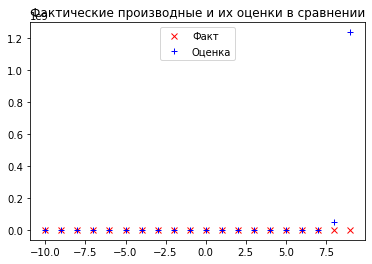

In [20]:
import matplotlib.pyplot as plt
from functools import partial
import random

# Градиент - вектор, составленный из частных производных

def sum_of_squares(v):
    """
    Вычисляет сумму квадратов элементов вектора v
    """
    return sum([v_i ** 2 for v_i in v])


def square(x):
    return x**x

# Вычисление градиента
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

#оценка производной
derivative_extimate = partial(difference_quotient, square, h=0.00001)

# построение диаграммы, для демонстрации фактических производных
xs = range(-10, 10)
ls1 = [2*x for x in xs]
ls2 = [derivative_extimate(x) for x in xs]
plt.title('Фактические производные и их оценки в сравнении')
plt.plot(xs, ls1, 'rx', label='Факт')
plt.plot(xs, ls2, 'b+', label='Оценка')
plt.legend(loc=9)
plt.show()


In [21]:
# выше что-то пошло не так, как в книге. Видимо не оттуда импортировал partial

In [22]:
# частное отношение приращений
def partial_difference_quotient(f, v, i, h):
    """
    Вычислить i-e частное отношение приращений функции f в векторе v
    """
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h


# оценить градиент
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

In [23]:
# Использование градиента

def step(v, direction, step_size):
    """
    шаг градиента
    """
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    """
    градиент суммы квадратов
    """
    return [2 * v_i for v_i in v]

# выбрать произвольную отправную точку
v = [random.randint(-10, 10) for i in range(3)]

# константа точности расчета
tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    # не понятно откуда в книге взялся distance     
    if distance(next_v, v) < tolerance:
        break
    v = next_v
    

NameError: name 'distance' is not defined